In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.python.keras import backend as k

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

import cv2 as cv

import seaborn as sns

In [74]:
PATH = os.path.join('E:\sample diff')

In [75]:
train_dir = os.path.join(PATH, 'Train 3classes')
validation_dir = os.path.join(PATH, 'Val 3classes')

In [76]:
Train_Set="E:\sample diff\Train 3classes"
Val_Set="E:\sample diff\Val 3classes"


#Categroized images
#4 types of subCategories

CATEGORIES=["Eosinophil","Lymphocyte","Neutrophil"]

In [77]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [78]:
batch_size = 32
epochs = 15
IMG_HEIGHT = 48
IMG_WIDTH = 48

In [79]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 15863 images belonging to 3 classes.


In [80]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1092 images belonging to 3 classes.


In [81]:
Train_Data=[]
import cv2 as cv
for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(Train_Set,category)
        
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1) ## 0-for Greyscale ,, 1--for RGB...
            #img = tf.image.rgb_to_grayscale(img, name=None)
            Train_Data.append([img,label])

In [82]:
Test_Data=[]

for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(Val_Set,category)
        
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            #img = tf.image.rgb_to_grayscale(img, name=None)
            Test_Data.append([img,label])

In [83]:
print(len(Train_Data))
print(len(Test_Data))

15863
1092


In [84]:
import random

random.shuffle(Train_Data)


In [85]:
for lbl in Train_Data[:10]:
    print(lbl[1])

2
1
2
2
2
1
2
2
1
2


In [86]:
train_X=[]
train_y=[]

for features,label in Train_Data:
    train_X.append(features)
    train_y.append(label)

len(train_X),len(train_y)

(15863, 15863)

In [87]:
#lets seprate the feature and target variable
test_X=[]
test_y=[]

for features,label in Test_Data:
    test_X.append(features)
    test_y.append(label)

len(test_X),len(test_y)

(1092, 1092)

In [88]:

train_X=np.array(train_X).reshape(-1,48,48,3)
train_X=train_X/255.0
train_X.shape

(15863, 48, 48, 3)

In [89]:
test_X=np.array(test_X).reshape(-1,48,48,3)
test_X=test_X/255.0
test_X.shape

(1092, 48, 48, 3)

In [90]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

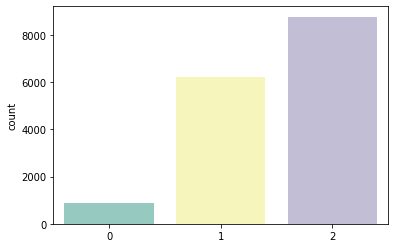

In [91]:
sns.countplot(train_y,palette='Set3')

In [92]:
from keras.utils import to_categorical
#train y
one_hot_train=to_categorical(train_y)
one_hot_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [93]:
one_hot_test=to_categorical(test_y)
one_hot_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [94]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten,BatchNormalization
from keras.applications import vgg16 
from keras.layers import AveragePooling2D
from keras.preprocessing import image

In [95]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides = (1, 1), activation = 'relu', input_shape = (48, 48, 3)))
model.add(MaxPool2D(pool_size = (2,2)))
##model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), strides = (1, 1), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
#model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), strides = (1,1), activation = 'relu'))
#model.add(Conv2D(256, (3,3), strides = (1, 1), activation = 'relu'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(1024, activation = 'relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(512, activation = 'relu'))
#model.add(Dropout(0.1))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [96]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
__________

In [97]:
hist=model.fit(train_X,one_hot_train,epochs=30,batch_size=32,validation_data=(test_X,one_hot_test))

Train on 15863 samples, validate on 1092 samples
Epoch 1/30
15863/15863 [==============================] - 12s 733us/step - loss: 0.5053 - acc: 0.7666 - val_loss: 0.3371 - val_acc: 0.8727
Epoch 2/30
15863/15863 [==============================] - 10s 638us/step - loss: 0.2192 - acc: 0.9204 - val_loss: 0.2904 - val_acc: 0.8864
Epoch 3/30
15863/15863 [==============================] - 10s 639us/step - loss: 0.1858 - acc: 0.9329 - val_loss: 0.1654 - val_acc: 0.9322
Epoch 4/30
15863/15863 [==============================] - 10s 639us/step - loss: 0.1678 - acc: 0.9390 - val_loss: 0.1513 - val_acc: 0.9405
Epoch 5/30
15863/15863 [==============================] - 10s 638us/step - loss: 0.1489 - acc: 0.9482 - val_loss: 0.1463 - val_acc: 0.9469
Epoch 6/30
15863/15863 [==============================] - 10s 642us/step - loss: 0.1276 - acc: 0.9546 - val_loss: 0.1200 - val_acc: 0.9588
Epoch 7/30
15863/15863 [==============================] - 10s 647us/step - loss: 0.1219 - acc: 0.9570 - val_loss: 0.1

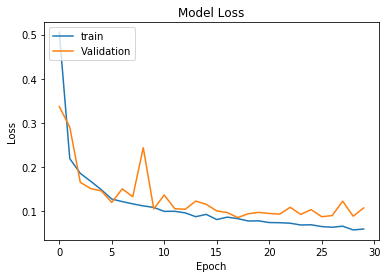

In [98]:
#train and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

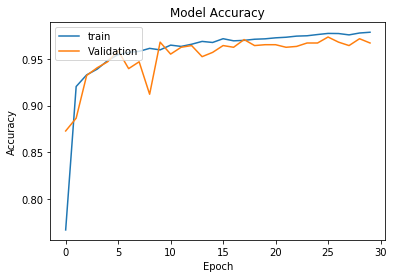

In [99]:
#train and validation accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

In [100]:
y_pred=model.predict_classes(test_X)

In [101]:
#accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(test_y,y_pred)


0.967032967032967

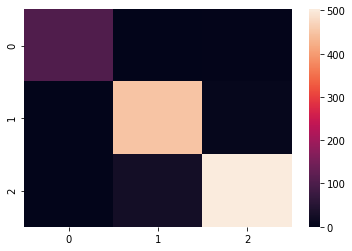

In [102]:
sns.heatmap(confusion_matrix(test_y,y_pred))

In [103]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      cm = cm * 100
      print("\nNormalized confusion matrix")
  else:
      print('\nConfusion matrix, without normalization')
  print(cm)
  print ()

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.0f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


In [104]:

y_pred=model.predict_classes(test_X)
cnf_matrix = confusion_matrix(test_y, y_pred)
np.set_printoptions(precision=2) # set NumPy to 2 decimal places

In [105]:
import itertools


Confusion matrix, without normalization
[[104   0   3]
 [  0 450   6]
 [  1  26 502]]



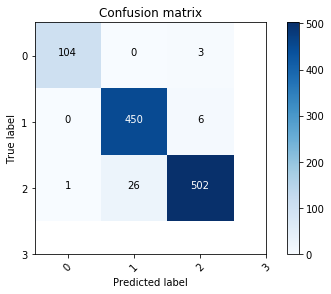

In [106]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3])


Normalized confusion matrix
[[97.2   0.    2.8 ]
 [ 0.   98.68  1.32]
 [ 0.19  4.91 94.9 ]]



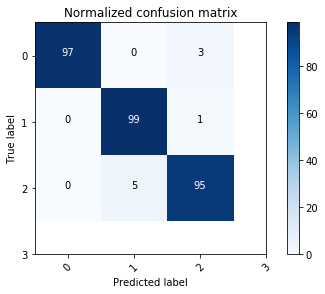

In [107]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3], normalize=True,
                      title='Normalized confusion matrix')          #-----------------to excel for comparision 

In [108]:
model.save('19th_may_3class_diff_best1.h5')